We illustrate a PRNG based on the Wichmann--Hill algorithm.

In [1]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1


In [2]:
seed(457428938475)
rnd_state


(4976, 20238, 499)

In [3]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x, y, z
    return (x/30269 + y/30307 + z/30323) % 1.0


In [4]:
rand(), rand(), rand()


(0.7645251082582081, 0.7920889799553945, 0.06912886811267205)

PRNG is deterministic given state; here, we fork so that the state is the same upen the invocations `rand()`.

In [5]:
import os

if os.fork(): print(f'In parent: {rand()}')
else:
    print(f'In child: {rand()}')
    os._exit(os.EX_OK)


In parent: 0.9559050644103264
In child: 0.9559050644103264

/tmp/ipykernel_18820/1462645932.py:3: DeprecationWarning: This process (pid=18820) is multi-threaded, use of fork() may lead to deadlocks in the child.
  if os.fork(): print(f'In parent: {rand()}')


We now illustrate how the individual invocations vary uniformly,

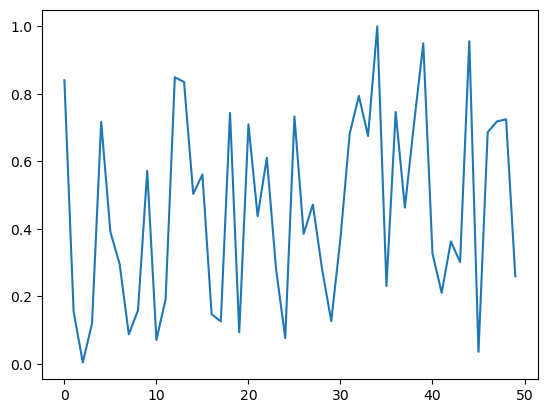

In [6]:
import matplotlib.pyplot as plt

plt.plot([rand() for _ in range(50)]);


yet tend to average out into a uniform distribution.

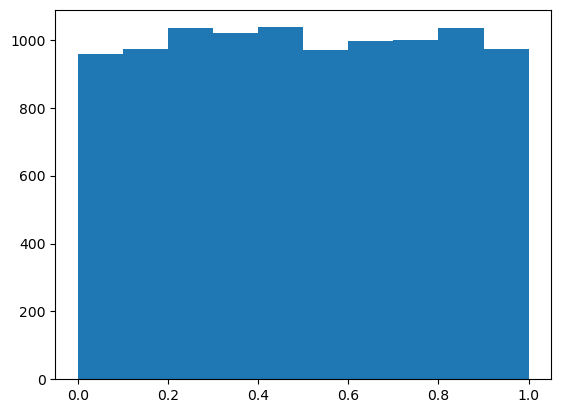

In [7]:
plt.hist([rand() for _ in range(10000)]);


We show just how much faster `torch`'s vectorized PRNG is compared to our looped PRNG implemented in Python

In [8]:
%timeit -n 10 [rand() for _ in range(7840)]


1.71 ms ± 116 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
import torch


In [10]:
%timeit -n 10 torch.randn(784, 10)


41.9 µs ± 24 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
